In [1]:
import numpy as np
import pandas as pd
from sklearn import tree


In [2]:
input_file="./datasets/PastHires.csv"

In [3]:
input_file

'./datasets/PastHires.csv'

In [4]:
df=pd.read_csv(input_file,header=0)

In [5]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


## Changing non numbers to number for scikit learn(it only takes numbers) 

In [6]:
d={'Y':1,"N":0}
df['Hired']=df['Hired'].map(d)

In [7]:
df["Hired"]

0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     1
8     1
9     0
10    0
11    1
12    1
Name: Hired, dtype: int64

In [8]:
df['Employed?']=df['Employed?'].map(d)
df["Top-tier school"]=df['Top-tier school'].map(d)
df['Interned']=df['Interned'].map(d)

In [9]:
d={'BS':1,"MS":2,"PhD":3}
df['Level of Education']=df['Level of Education'].map(d)

In [10]:
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,1,0,0,1
1,0,0,0,1,1,1,1
2,7,0,6,1,0,0,0
3,2,1,1,2,1,0,1
4,20,0,2,3,1,0,0
5,0,0,0,3,1,1,1
6,5,1,2,2,0,1,1
7,3,0,1,1,0,1,1
8,15,1,5,1,0,0,1
9,0,0,0,1,0,0,0


In [11]:
features=list(df.columns[:-1])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [12]:
y=df["Hired"]
x=df[features]
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x,y)

In [13]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
import pydotplus
from IPython.display import Image

In [15]:
from sklearn.externals.six import StringIO
# here used scikit-learn v0.22

/home/drastraios/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [16]:
dot_data=StringIO()
dot_data


In [17]:
tree.export_graphviz(clf,out_file=dot_data,feature_names=features)


In [18]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())


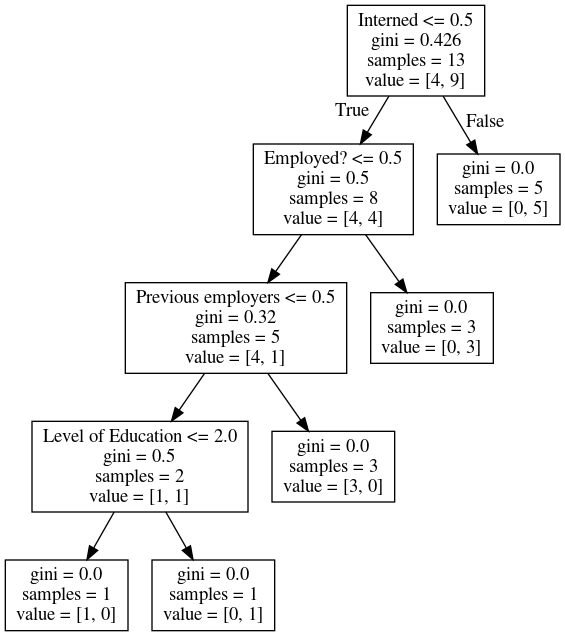

In [19]:
Image(graph.create_png())